## **Predict my Marks - Regression**

<div class="alert alert-block alert-info">
<b> Project : mlX Regression Challenge </b> <br> 
    
   
    Try to predict the scores of the students in the final G3 exam based on the given features.
    Goal : 최종 G3 시험에서 학생들의 점수를 예측해 보세요.

    
</div>

<div class="alert alert-block alert-info">
    <b>Metric of Evalutaion: Root Mean Square error(RMSE)  </b>
</div>


### Introduce 

- Address : Rural (R) or Urban (U) #농촌(R) 또는 도시(U)
- famsize : #패밀리 사이즈 3(GT3)이상 3(LT3)미만
- Pstatus : Parents stay together (T) / Parents are apart (A) 
- Medu : Mother's education
- Fedu : Father's education
- schoolsup : extra tuition support #추가 등록금 지원
- famsup : family educational support #가족 교육적 지원
- higher : wants to pursue higher education #고둥교육 추구
- romantic : is in a relationship #연애여부
- Dalc : workday alcohol consumption (1= very low and 5=very high) #평일 음주량
- Walc : weekend alcohol consumption (1= very low and 5=very high) #주말 음주량
- G1 : Marks of student in first period
- G2 : Marks of student in second period
- famrel : quality of family relationship

**Goal - to predict student marks in G3 (third period)**

#### import 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

%matplotlib inline

In [2]:
mark_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## **1. Dataset Description** 

In [3]:
mark_data.shape

(454, 34)

In [4]:
mark_data.head()

,ID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,641,GP,M,17.0,U,GT3,T,2.0,3.0,other,...,5.0,2.0,2.0,1.0,1.0,2.0,2.0,9.237551,12.231771,13.248906
1,510,GP,NaN,16.0,U,LE3,T,2.0,4.0,other,...,4.0,2.0,2.0,1.0,2.0,5.0,2.0,14.232852,12.243083,13.201829
2,516,GP,F,15.0,U,GT3,NaN,2.0,3.0,other,...,3.0,NaN,NaN,NaN,1.0,NaN,4.0,11.206084,NaN,11.100779
3,306,GP,M,15.0,R,GT3,T,3.0,4.0,NaN,...,5.0,3.0,NaN,1.0,1.0,5.0,2.0,12.202626,11.187831,11.176760
4,124,NaN,F,16.0,U,NaN,T,2.0,2.0,NaN,...,4.0,3.0,4.0,1.0,2.0,2.0,6.0,13.134366,11.210160,11.231368


In [5]:
mark_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          454 non-null    int64  
 1   school      405 non-null    object 
 2   sex         396 non-null    object 
 3   age         391 non-null    float64
 4   address     403 non-null    object 
 5   famsize     405 non-null    object 
 6   Pstatus     401 non-null    object 
 7   Medu        396 non-null    float64
 8   Fedu        416 non-null    float64
 9   Mjob        399 non-null    object 
 10  Fjob        411 non-null    object 
 11  reason      407 non-null    object 
 12  guardian    413 non-null    object 
 13  traveltime  411 non-null    float64
 14  studytime   405 non-null    float64
 15  failures    407 non-null    float64
 16  schoolsup   407 non-null    object 
 17  famsup      409 non-null    object 
 18  paid        412 non-null    object 
 19  activities  403 non-null    o

In [56]:
mark_data.columns #데이터 프레임 열의 값, 1차원 리스트

Index(['ID', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
object_feature = mark_data.select_dtypes("object") #데이터프레임
numeric_feature = mark_data.select_dtypes(np.number) #데이터프레임

In [46]:
from prettytable import PrettyTable


table = PrettyTable()
table.field_names = ['Index', 'Features', 'Unique Values CNT']
for idx, column in enumerate(list(mark_data.columns), start=1):
    nunique = mark_data[column].nunique() #nunique는 na는 제외하고
    table.add_row([idx, column, f'{nunique}'])
    
    
print(f'Total Dataset Value : {mark_data.shape[0]} \n') 
print(table)


Total Dataset Value : 454 

+-------+------------+-------------------+
| Index |  Features  | Unique Values CNT |
+-------+------------+-------------------+
|   1   |     ID     |        454        |
|   2   |   school   |         2         |
|   3   |    sex     |         2         |
|   4   |    age     |         8         |
|   5   |  address   |         2         |
|   6   |  famsize   |         2         |
|   7   |  Pstatus   |         2         |
|   8   |    Medu    |         5         |
|   9   |    Fedu    |         5         |
|   10  |    Mjob    |         5         |
|   11  |    Fjob    |         5         |
|   12  |   reason   |         4         |
|   13  |  guardian  |         3         |
|   14  | traveltime |         4         |
|   15  | studytime  |         4         |
|   16  |  failures  |         4         |
|   17  | schoolsup  |         2         |
|   18  |   famsup   |         2         |
|   19  |    paid    |         2         |
|   20  | activities |    

In [59]:
cat_num_col = [column for column, count in zip(numeric_feature.columns, numeric_feature.nunique().values) if count < 10]

In [60]:
print(cat_num_col)

['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']


In [61]:
for col in cat_num_col:
    print(f'unique values od {col} : {np.sort(mark_data[col].dropna().unique())}')

unique values od age : [15. 16. 17. 18. 19. 20. 21. 22.]
unique values od Medu : [0. 1. 2. 3. 4.]
unique values od Fedu : [0. 1. 2. 3. 4.]
unique values od traveltime : [1. 2. 3. 4.]
unique values od studytime : [1. 2. 3. 4.]
unique values od failures : [0. 1. 2. 3.]
unique values od famrel : [1. 2. 3. 4. 5.]
unique values od freetime : [1. 2. 3. 4. 5.]
unique values od goout : [1. 2. 3. 4. 5.]
unique values od Dalc : [1. 2. 3. 4. 5.]
unique values od Walc : [1. 2. 3. 4. 5.]
unique values od health : [1. 2. 3. 4. 5.]


- 실제 연속적인 숫자값을 가진 컬럼은 G1, G2, G3
- 3개의 제외한 컬럼은 정수형의 이산적인 데이터-> 범주형 속성을 지님.

In [47]:
for col in object_feature:
    print(f'unique value of {col} : {np.sort(mark_data[col].dropna().unique())}')

unique value of school : ['GP' 'MS']
unique value of sex : ['F' 'M']
unique value of address : ['R' 'U']
unique value of famsize : ['GT3' 'LE3']
unique value of Pstatus : ['A' 'T']
unique value of Mjob : ['at_home' 'health' 'other' 'services' 'teacher']
unique value of Fjob : ['at_home' 'health' 'other' 'services' 'teacher']
unique value of reason : ['course' 'home' 'other' 'reputation']
unique value of guardian : ['father' 'mother' 'other']
unique value of schoolsup : ['no' 'yes']
unique value of famsup : ['no' 'yes']
unique value of paid : ['no' 'yes']
unique value of activities : ['no' 'yes']
unique value of nursery : ['no' 'yes']
unique value of higher : ['no' 'yes']
unique value of internet : ['no' 'yes']
unique value of romantic : ['no' 'yes']


### 1-2 연속형 특성의 관계

In [12]:
numeric_feature.describe()

,ID,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,454.000000,391.000000,396.000000,416.000000,411.000000,405.000000,407.000000,410.000000,407.000000,421.000000,405.000000,420.000000,405.000000,408.000000,409.000000,410.000000,454.000000
mean,326.458150,16.723785,2.530303,2.324519,1.542579,1.933333,0.218673,3.868293,3.189189,3.161520,1.540741,2.269048,3.454321,3.723039,11.573324,11.662033,11.992548
std,190.663745,1.213354,1.154667,1.105506,0.729191,0.828335,0.577787,0.977607,1.074139,1.161912,0.952560,1.266983,1.476218,4.905922,2.696468,2.967221,3.292919
min,1.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.183922,0.120467,0.102433
25%,158.750000,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,3.000000,2.500000,2.000000,1.000000,1.000000,2.000000,0.000000,10.122587,10.114836,10.196103
50%,328.500000,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.216576,11.239625,12.139594
75%,494.750000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,4.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.233304,13.216036,14.148699
max,646.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.248120,19.102766,19.182714


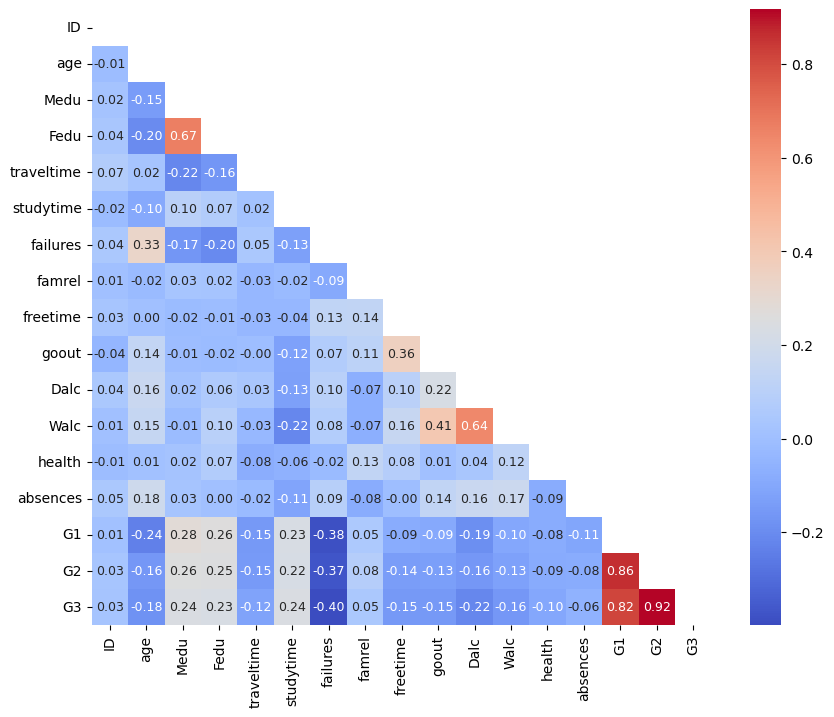

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
mask = np.triu(numeric_feature.corr())
sns.heatmap(numeric_feature.corr(),  cmap='coolwarm', annot=True, fmt='.2f', annot_kws={'size':9}, ax=ax, mask=mask)
plt.show()

In [49]:
corr = numeric_feature.corr()

In [50]:
coor_df = pd.DataFrame(
    corr[numeric_feature.corr() != 1].stack().sort_values(ascending=False, key=np.abs)
        .drop_duplicates()[:-1],
    columns=["상관계수"]
)
coor_df.head(15)

상관계수
G3       G2        0.917332
G2       G1        0.864020
G1       G3        0.815049
Medu     Fedu      0.666163
Walc     Dalc      0.643166
         goout     0.407357
G3       failures -0.399185
failures G1       -0.384373
G2       failures -0.371524
goout    freetime  0.361758
age      failures  0.329788
G1       Medu      0.280957
         Fedu      0.259429
Medu     G2        0.256376
G2       Fedu      0.251924

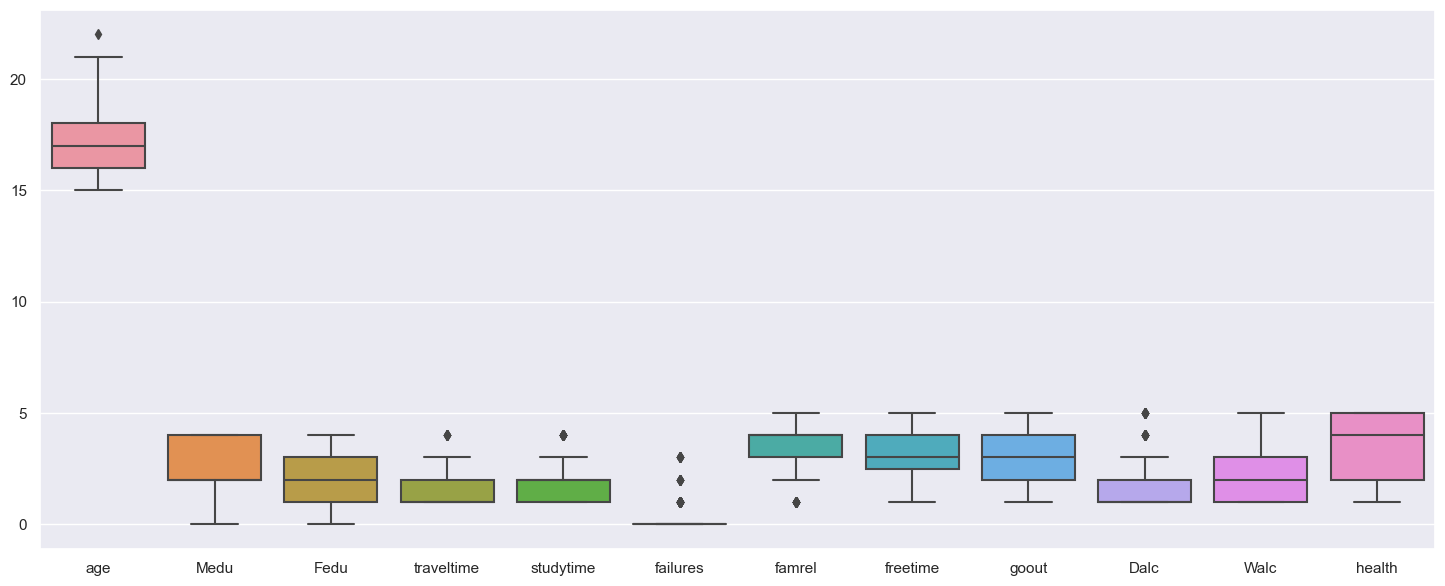

In [82]:
sns.set(palette="gnuplot2")
fix, ax= plt.subplots(figsize=(18,7))
sns.boxplot(numeric_feature[cat_num_col], ax=ax)
plt.show()

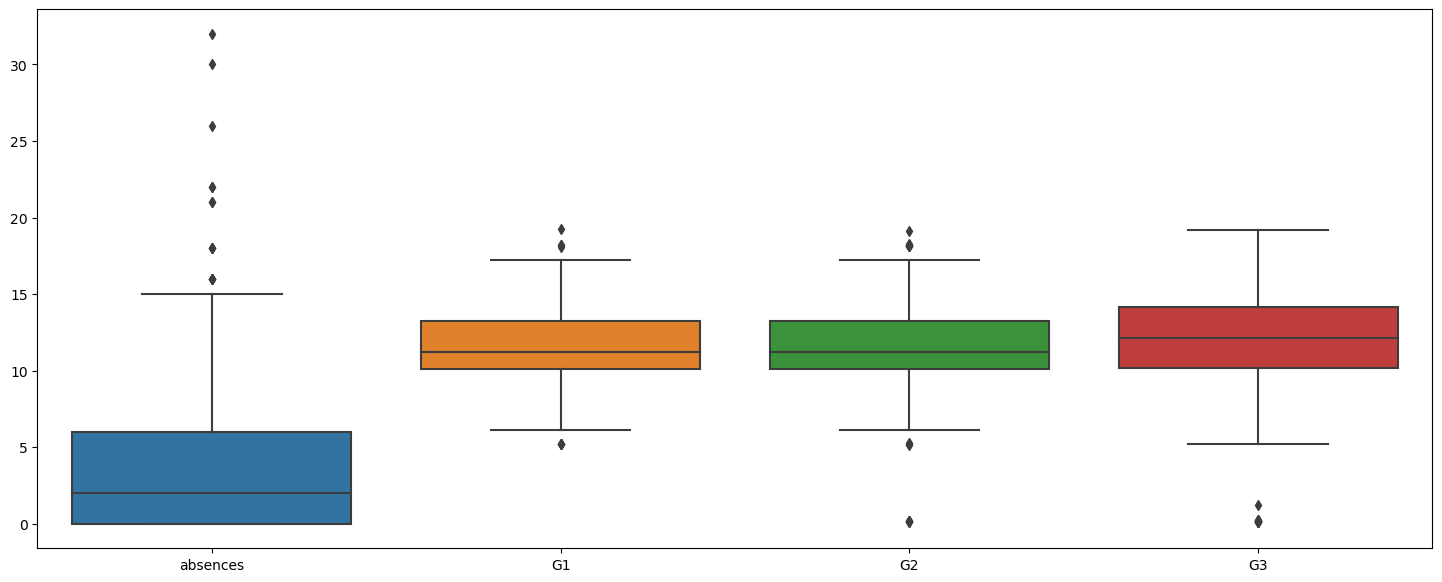

In [78]:
fig, ax = plt.subplots(figsize=(18,7))
sns.boxplot(numeric_feature.drop(columns=cat_num_col+['ID']), ax=ax)
plt.show()

In [66]:
def outlier_thresholds(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR_range = Q3-Q1
    up_fence = Q3 + 1.5 * IQR_range
    low_fence = Q1 - 1.5 * IQR_range
    return low_fence, up_fence

In [70]:
#15가 넘어가면 아웃라이어
outlier_thresholds(mark_data, 'absences')[1]

15.0

### 1-3 범주형 특성과 타겟의 관계

In [71]:
object_feature.describe()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,405,396,403,405,401,399,411,407,413,407,409,412,403,409,418,406,411
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,277,226,283,289,356,165,231,173,293,365,249,386,202,320,367,313,259


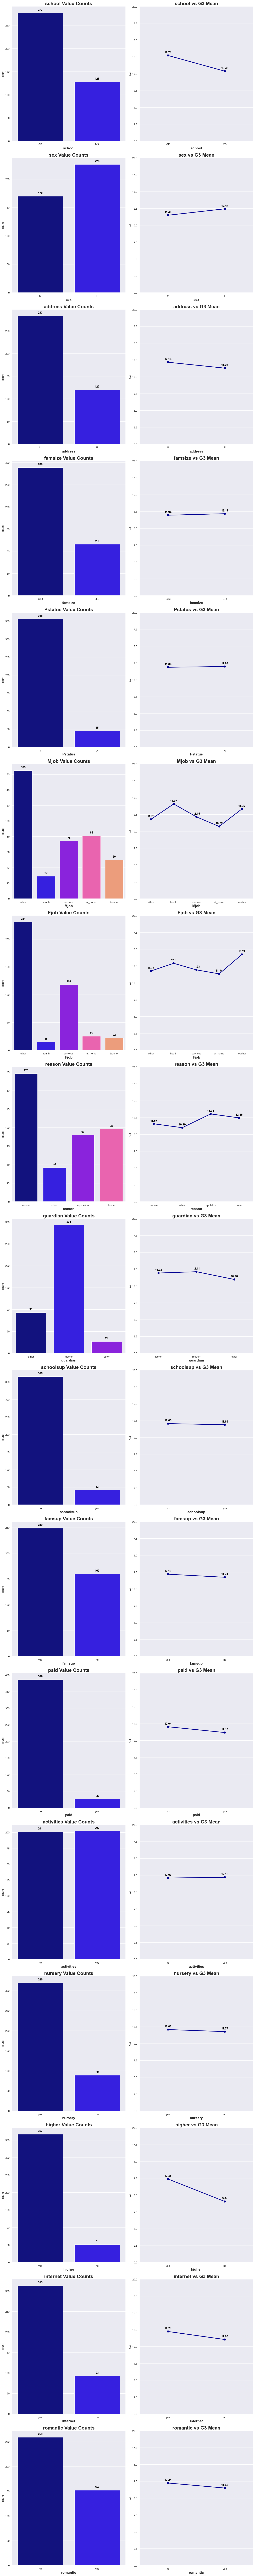

In [170]:
fig, axes = plt.subplots(17, 2, figsize=(15, 150))

for i, col in enumerate(object_feature.columns):
    # 범주형 변수의 빈도 그래프
    ax1 = sns.countplot(x=col, data=mark_data, ax=axes[i, 0])
    ax1.set_title(f'{col} Value Counts', {'size': 20, 'weight': 'bold'})
    ax1.set_xlabel(col, {"size": 15, "weight": "bold"})

    # 빈도값 텍스트 추가
    for p in ax1.patches: #pathches는 그래프 바들
        ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', fontweight='bold', fontsize=12, color='black', xytext=(0, 10),
                    textcoords='offset points')
     
    #각 컬럼의 클래스별 'G3'의 평균 그래프        
    ax2 = sns.pointplot(x=col, y='G3', data=mark_data, errorbar=None, ax=axes[i, 1])
    ax2.set_ylim(0,20)
    ax2.set_title(f'{col} vs G3 Mean', {'size': 20, 'weight': 'bold'})
    ax2.set_xlabel(col, {"size": 15, "weight": "bold"})
    
    # 클래스별 'G3' 평균 텍스트 추가
    for x_data, y_data in zip(ax2.lines[0].get_xdata(), ax2.lines[0].get_ydata()):
        ax2.annotate(f'{round(y_data, 2)}', (x_data, y_data),
                     ha='center', fontweight='bold', fontsize=12, color='black', xytext=(0, 10),
                     textcoords='offset points')

        



plt.tight_layout()
plt.show()

### 1-4.결측치(missing value)

In [211]:
#missing value ratio check
train_na_ratio = mark_data.isna().sum() / len(mark_data) * 100
test_na_ratio = test_data.isna().sum() / len(test_data) * 100
df = pd.concat((train_na_ratio, test_na_ratio),axis=1,)
df.columns=["train_na_ratio","test_na_ratio"]
df

,train_na_ratio,test_na_ratio
ID,0.000000,0.000000
school,10.792952,11.282051
sex,12.775330,9.230769
age,13.876652,10.256410
address,11.233480,8.205128
famsize,10.792952,11.282051
Pstatus,11.674009,14.358974
Medu,12.775330,13.333333
Fedu,8.370044,10.769231
Mjob,12.114537,11.282051


In [199]:
# 총 453행 중에 1개이상 결측치 443행 ; 대부분 1개이상 결측치 있음
# Out of a total of 453 rows, at least one missing value is 443 rows; 
# most have at least one missing value in rows
print('Train total rows:', len(mark_data)) #total rows
print('missing rows:',mark_data.isna().any(axis=1).sum()) 

Train total rows: 454
missing rows: 443


In [198]:
print('Test total rows:', len(test_data)) #total rows
print('missing rows:',test_data.isna().any(axis=1).sum()) #missing rows

Test total rows: 195
missing rows: 191


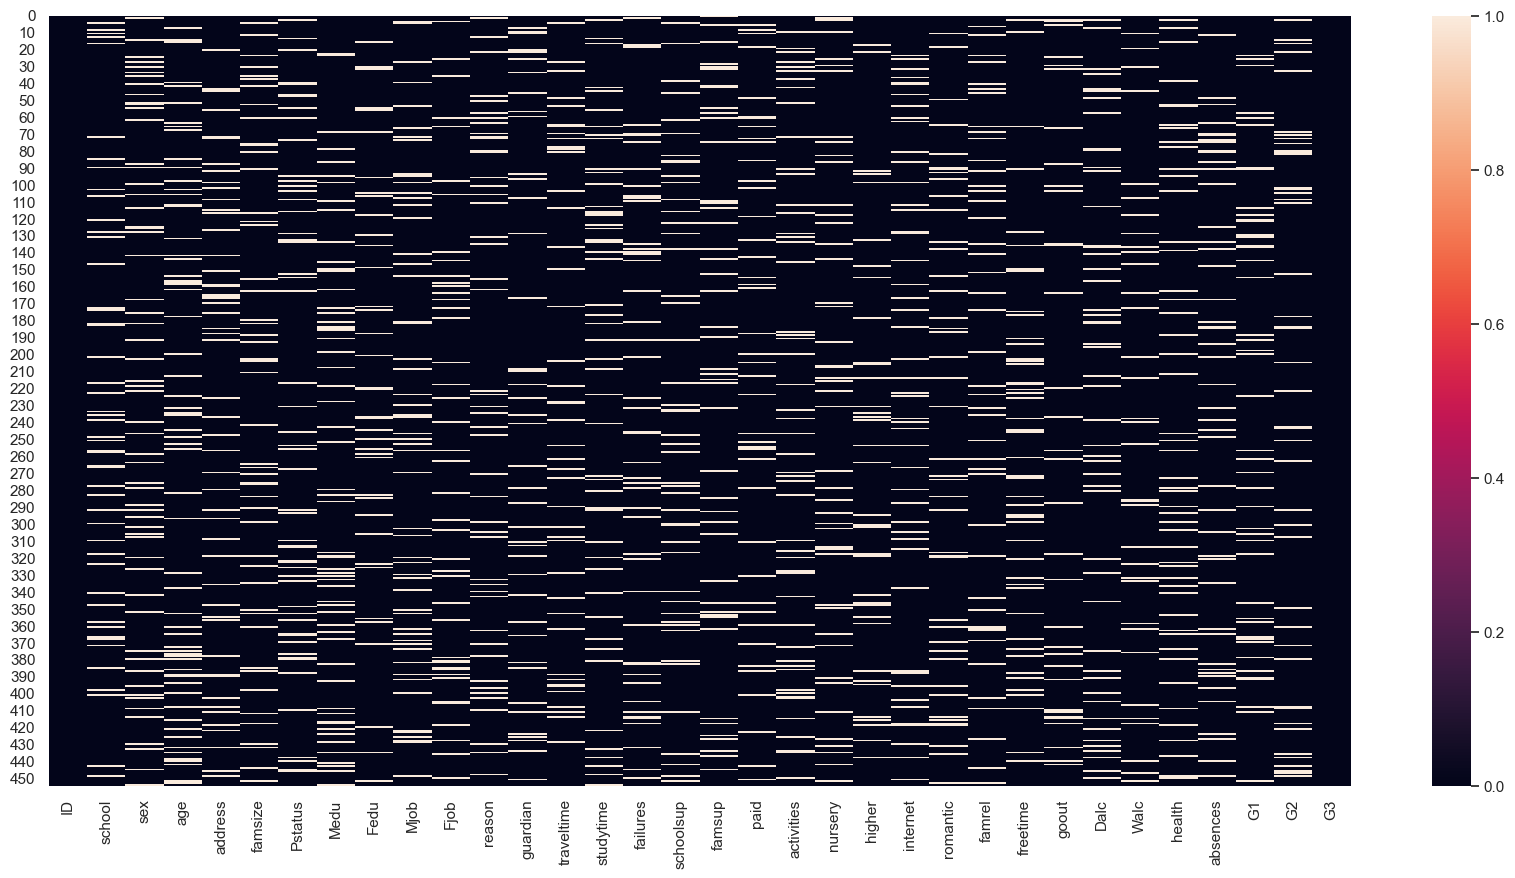

In [188]:
#pattern of missing value
#결측치 패턴 확인 
fig, ax = plt.subplots(figsize=(21,10))
sns.heatmap(mark_data.isna(), ax=ax)
plt.show()

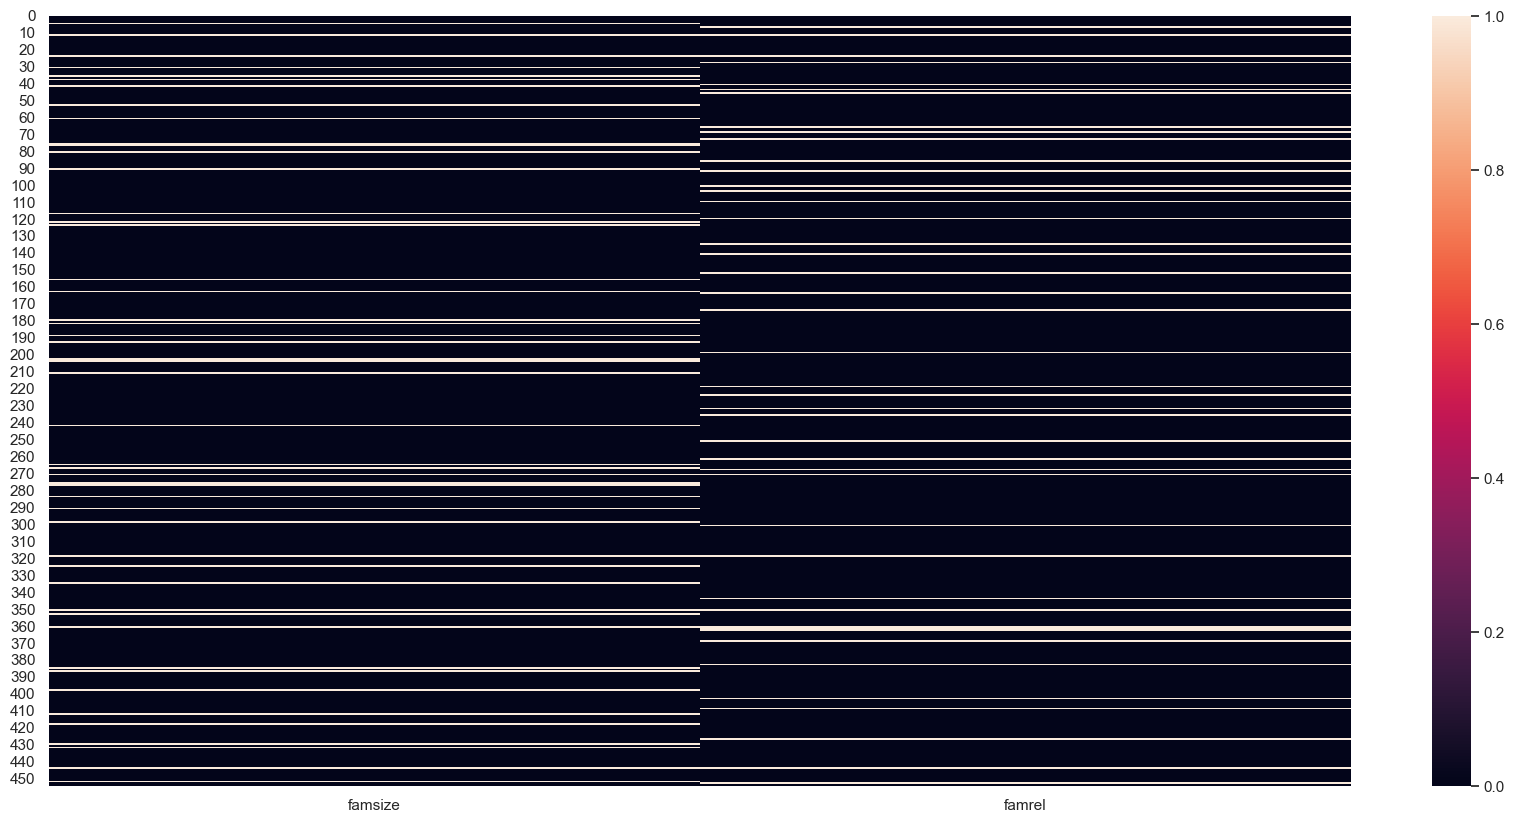

In [175]:
#결측치 패턴 확인 
fig, ax = plt.subplots(figsize=(21,10))
sns.heatmap(mark_data[['famsize','famrel']].isna(), ax=ax)
plt.show()

Text(0.5, 1.0, 'Correlation with Missing Values')

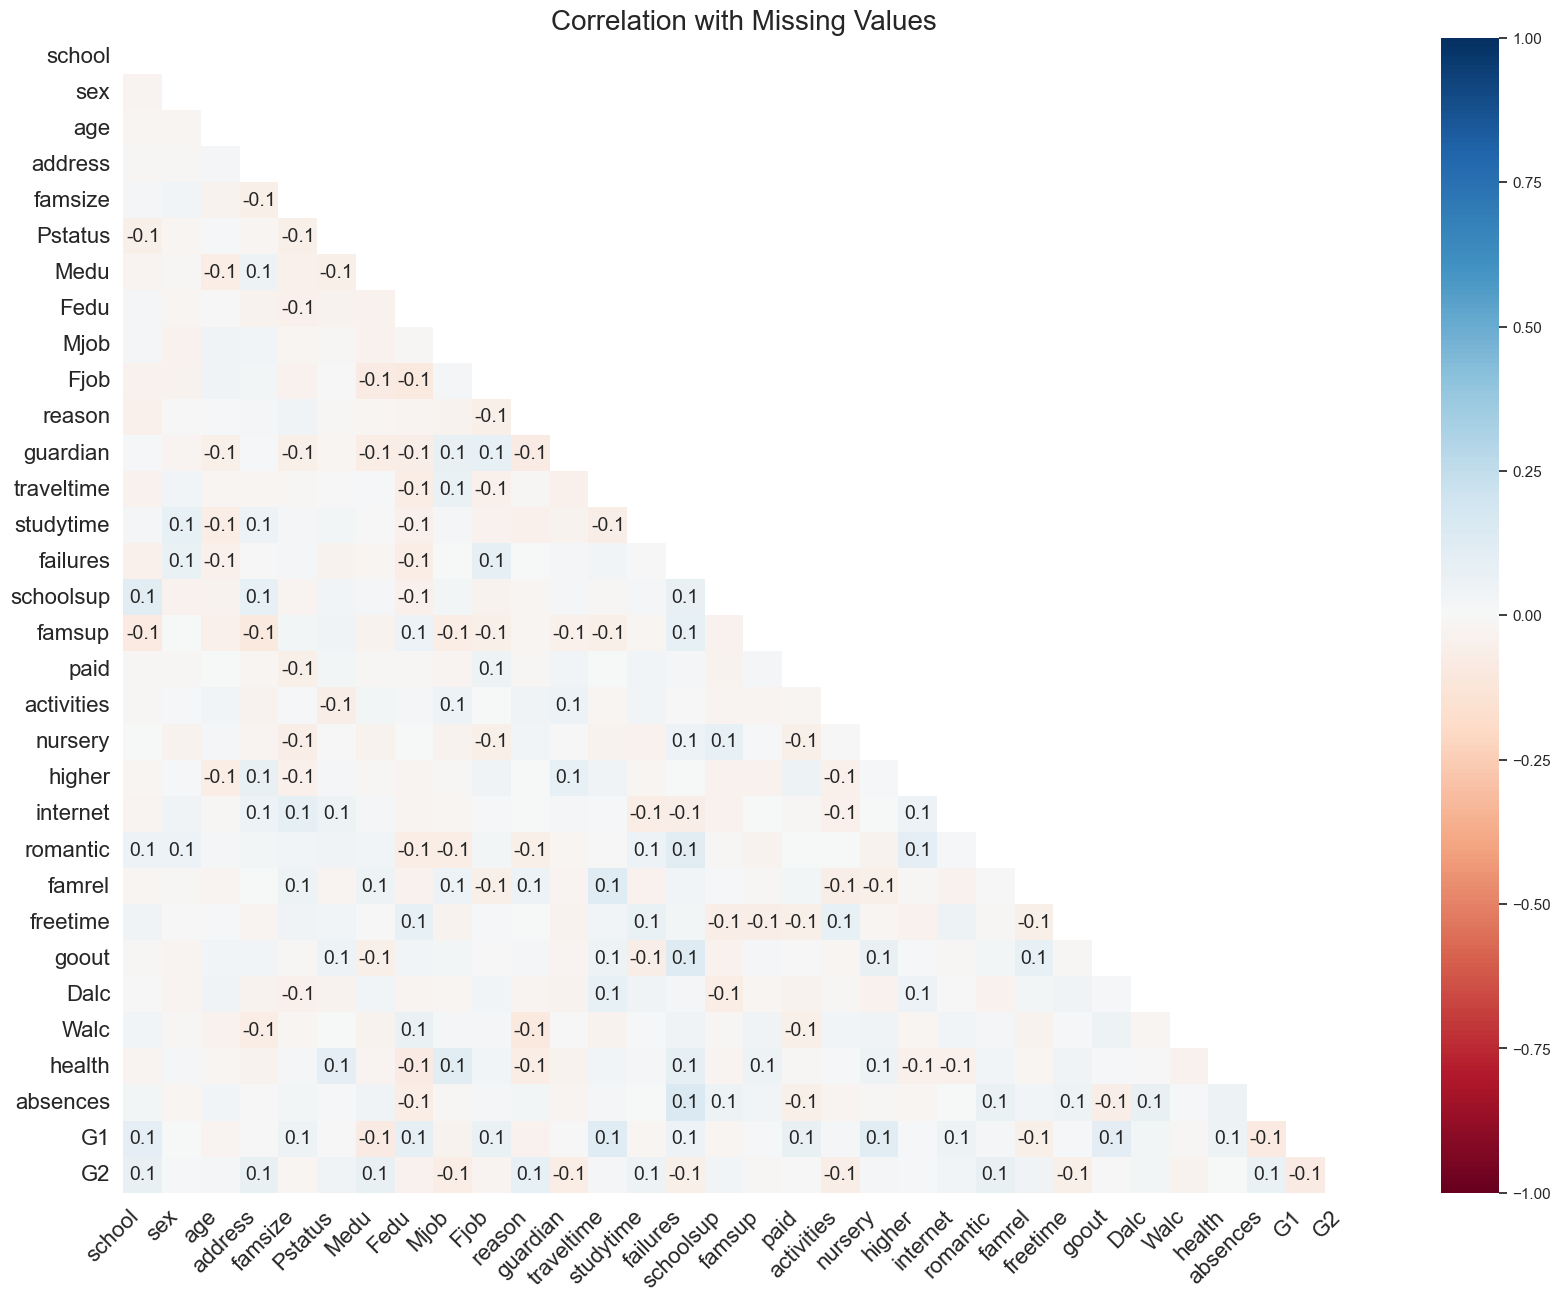

In [182]:
#결측치 끼리의 상관관계
import missingno as msno
nan_df = mark_data.columns[mark_data.isna().any()].tolist()
msno.heatmap(mark_data[nan_df], figsize=(20,15))
plt.title("Correlation with Missing Values", fontsize = 20)

결측치끼리의 상관성은 없는것을 확인할 수 있다.
It can be seen that there is no correlation between missing values.

#결측치 유형
- MCAR(Missing Completely At Random, 완전 무작위 결측)

## 2. 결측치 처리별 파이프라인 구성

In [103]:
from sklearn import set_config

#globally setting
set_config(transform_output="pandas")

In [3]:
X = mark_data.drop(columns='G3')
y = mark_data.G3

In [5]:
from sklearn.model_selection import train_test_split

target = mark_data['G3']
features = mark_data.drop(columns='G3')

train_X, test_X, train_y, test_y = train_test_split(features, target, test_size=0.2, random_state=42)

In [43]:
cat_num_col = [column for column, count in zip(numeric_feature.columns, numeric_feature.nunique().values) if count < 10]

In [44]:
num_cols = ['G1','G2'] #연속형
nominal_column = X.select_dtypes("object").columns #명목형
ordinal_column = X[cat_num_col].drop(columns='age').columns #순서형
discrete_column = ["failures", "absences"] #이산형
# "age" 

### 2-1. SimpleImputer

* 명목형 특성의 결측치 : 최빈값 대입 -> one-hot
* 순서형 특성의 결측치 : 최빈값 대입 -> ordinal
* 이산형 특성의 결측치 : 중앙값 대입 -> robust
* 연속형 특성1의 결측치 : 중앙값 대입 -> age : round -> robust
* 연속형 특성2의 결측치 : 평균 대입 -> G1, G2 : min-max

In [77]:
preprocessing_1 = ColumnTransformer([('nominal', Pipeline([('mode', SimpleImputer(strategy='most_frequent')),
                                                           ('one-hot', OneHotEncoder(sparse_output=False))]),
                                      nominal_column),
                                     ('ordinal', Pipeline([('mode', SimpleImputer(strategy='most_frequent')),
                                                           ('ord',OrdinalEncoder())]),
                                      ordinal_column),
                                     ('discrete', Pipeline([('median', SimpleImputer(strategy='median')),
                                                            ('robust', RobustScaler())]),
                                      discrete_column),
                                     ('age', Pipeline([('median', SimpleImputer(strategy='median')), 
                                                       ('robust', RobustScaler())]),
                                      ['age']),
                                     ('num', Pipeline([('mean', SimpleImputer(strategy='mean')),
                                                       ('mm', MinMaxScaler())]),
                                      num_cols)])

In [58]:
preprocessing_2 = ColumnTransformer([('nominal', Pipeline([('mode', SimpleImputer(strategy='most_frequent')),
                                                           ('one-hot', OneHotEncoder())]),
                                      nominal_column),
                                     ('ordinal', Pipeline([('mode', SimpleImputer(strategy='most_frequent')),
                                                           ('min-max',MinMaxScaler())]),
                                      ordinal_column),
                                     ('discrete', Pipeline([('median', SimpleImputer(strategy='median')),
                                                            ('robust', RobustScaler())]),
                                      discrete_column),
                                     ('age', Pipeline([('median', SimpleImputer(strategy='median')), 
                                                       ('robust', RobustScaler())]),
                                      ['age']),
                                     ('num', Pipeline([('mean', SimpleImputer(strategy='mean')),
                                                       ('mm', MinMaxScaler())]),
                                      num_cols)])

In [49]:
preprocessing_1

ColumnTransformer(transformers=[('nominal',
                                 Pipeline(steps=[('mode',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one-hot', OneHotEncoder())]),
                                 Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=...
       'freetime', 'goout', 'Dalc', 'Walc', 'health'],
      dtype='object')),
                                ('discrete',
                                 Pipeline(steps=[('median',
                                                  SimpleImputer(strategy='median')),
                                                 ('robust', RobustScaler())]),
                                 ['failures', 'absences']),
                                ('age',
                                 Pipeline(steps=[('median',
                                                  SimpleImputer(strategy='median')),
                                                 ('robust', RobustScaler())]),
                                 ['age']),
                                ('num',
                                 Pipeline(steps=[('mean', SimpleImputer()),
                                                 ('mm', MinMaxScaler())]),
                                 ['G1', 'G2'])])

### 2-2. KNNImputer

* 명목형 특성의 결측치 : 최빈값 -> one-hot
* 순서형 특성의 결측치 : n_neighbors = 3 or 5 -> min-max
* 이산형(실패, 결석) 특성의 결측치 : n_neighbors = 3 or 5 -> robust
* 연속형1 특성의 결측치 : n_neighbors = 3 or 5 -> age : robust
* 연속형2 특성의 결측치 : n_neighbors = 3 or 5 -> G1, G2 : min-max

In [59]:
preprocessing_2 = ColumnTransformer([("nominal", Pipeline([("mode", SimpleImputer(strategy="most_frequent")), 
                                                           ("one-hot", OneHotEncoder())]), 
                                      nominal_column), 
                                     ("ordinal", Pipeline([("knn_3", KNNImputer(n_neighbors=3)), 
                                                           ("round", FunctionTransformer(lambda x: x.round(), feature_names_out="one-to-one")), 
                                                           ("min-max", MinMaxScaler())]), 
                                      ordinal_column), 
                                     ("discrete", Pipeline([("knn_3", KNNImputer(n_neighbors=3)), 
                                                            ("round", FunctionTransformer(lambda x: x.round(), feature_names_out="one-to-one")), 
                                                            ("robust", RobustScaler())]), 
                                      discrete_column), 
                                     ("age", Pipeline([("knn_3", KNNImputer(n_neighbors=3)), 
                                                       ("round", FunctionTransformer(lambda x: x.round(), feature_names_out="one-to-one")), 
                                                       ("robust", RobustScaler())]), 
                                      ["age"]),
                                    ("num", Pipeline([("knn_3", KNNImputer(n_neighbors=3)),
                                                      ("mim-max", MinMaxScaler())]),
                                     num_cols)],
                                   remainder='drop')

In [60]:
preprocessing_2 = ColumnTransformer([("nominal", Pipeline([("mode", SimpleImputer(strategy="most_frequent")), 
                                                           ("one-hot", OneHotEncoder())]), 
                                      nominal_column), 
                                     ("ordinal", Pipeline([("knn_3", KNNImputer(n_neighbors=3)), 
                                                           ("round", FunctionTransformer(lambda x: x.round(), feature_names_out="one-to-one")), 
                                                           ("min-max", MinMaxScaler())]), 
                                      ordinal_column), 
                                     ("discrete", Pipeline([("knn_3", KNNImputer(n_neighbors=3)), 
                                                            ("round", FunctionTransformer(lambda x: x.round(), feature_names_out="one-to-one")), 
                                                            ("robust", RobustScaler())]), 
                                      discrete_column), 
                                     ("age", Pipeline([("knn_3", KNNImputer(n_neighbors=3)), 
                                                       ("round", FunctionTransformer(lambda x: x.round(), feature_names_out="one-to-one")), 
                                                       ("robust", RobustScaler())]), 
                                      ["age"]),
                                    ("num", Pipeline([("knn_3", KNNImputer(n_neighbors=3)),
                                                      ("mim-max", MinMaxScaler())]),
                                     num_cols)],
                                   remainder='drop')

In [61]:
preprocessing_3

ColumnTransformer(transformers=[('nominal',
                                 Pipeline(steps=[('mode',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one-hot', OneHotEncoder())]),
                                 Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=...
                                                 ('robust', RobustScaler())]),
                                 ['failures', 'absences']),
                                ('age',
                                 Pipeline(steps=[('knn_3',
                                                  KNNImputer(n_neighbors=3)),
                                                 ('round',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function <lambda> at 0x285d5e840>)),
                                                 ('robust', RobustScaler())]),
                                 ['age']),
                                ('num',
                                 Pipeline(steps=[('knn_3',
                                                  KNNImputer(n_neighbors=3)),
                                                 ('mim-max', MinMaxScaler())]),
                                 ['G1', 'G2'])])

### 2-3. IterativeImputer

* 명목형 특성의 결측치 : 최빈값 -> one-hot
* 순서형 특성의 결측치 : Logistic ("lbfgs", "liblinear") -> min-max
* 이산형 특성의 결측치 : Logistic ("lbfgs", "liblinear") -> robust
* 연속형1 특성의 결측치 : Logistic -> age : robust
* 연속형2 특성의 결측치 : Linear -> G1, G2 : min-max

* lbfgs : 2차 도함수를 정확하게 계산하는 것이 아니라 근사치를 사용하여 속도를 개선
* liblinear : 한 번에 하나의 파라미터만 업데이트

In [64]:
preprocessing_5 = ColumnTransformer([('nominal', Pipeline([('mode', SimpleImputer(strategy='most_frequent')),
                                                           ('oh', OneHotEncoder())]),
                                      nominal_column),
                                     ('ordinal', Pipeline([('iterative', IterativeImputer(estimator=LogisticRegression(n_jobs=-1, random_state=42))),
                                                            ('mm', MinMaxScaler())]),
                                      ordinal_column),
                                     ('discrete', Pipeline([('iterative', IterativeImputer(estimator=LogisticRegression(n_jobs=-1, random_state=42))),
                                                            ('robust', RobustScaler())]),
                                      discrete_column),
                                     ('age', Pipeline([('iterative', IterativeImputer(estimator=LogisticRegression(n_jobs=-1, random_state=42))),
                                                       ('robust', RobustScaler())]),
                                      ['age']),
                                     ('num', Pipeline([('iterative', IterativeImputer(estimator=LogisticRegression(n_jobs=-1, random_state=42))), 
                                                       ('mm', MinMaxScaler())]),
                                      num_cols)])                                  

In [65]:
preprocessing_5 = ColumnTransformer([('nominal', Pipeline([('mode', SimpleImputer(strategy='most_frequent')),
                                                           ('oh', OneHotEncoder())]),
                                      nominal_column),
                                     ('ordinal', Pipeline([('iterative', IterativeImputer(estimator=LogisticRegression(solver='liblinear', n_jobs=-1, random_state=42))),
                                                            ('mm', MinMaxScaler())]),
                                      ordinal_column),
                                     ('discrete', Pipeline([('iterative', IterativeImputer(estimator=LogisticRegression(solver='liblinear', n_jobs=-1, random_state=42))),
                                                            ('robust', RobustScaler())]),
                                      discrete_column),
                                     ('age', Pipeline([('iterative', IterativeImputer(estimator=LogisticRegression(solver='liblinear',n_jobs=-1, random_state=42))),
                                                       ('robust', RobustScaler())]),
                                      ['age']),
                                     ('num', Pipeline([('iterative', IterativeImputer(estimator=LogisticRegression(n_jobs=-1, random_state=42))), 
                                                       ('mm', MinMaxScaler())]),
                                      num_cols)])   

In [73]:
preprocessing_1.fit_transform(train_X)

,nominal__school_GP,nominal__school_MS,nominal__sex_F,nominal__sex_M,nominal__address_R,nominal__address_U,nominal__famsize_GT3,nominal__famsize_LE3,nominal__Pstatus_A,nominal__Pstatus_T,...,ordinal__freetime,ordinal__goout,ordinal__Dalc,ordinal__Walc,ordinal__health,discrete__failures,discrete__absences,age__age,num__G1,num__G2
24,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,3.0,2.0,2.0,2.0,1.0,1.0,1.5,2.0,0.352187,0.475218
17,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.569441,0.742213
66,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.350169,0.688745
371,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,3.0,2.0,0.0,0.0,3.0,0.0,-0.5,-1.0,0.781924,0.613431
253,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,2.0,3.0,0.0,3.0,2.0,0.0,-0.5,1.0,0.216946,0.526901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,3.0,2.0,0.0,2.0,4.0,0.0,0.5,2.0,0.214110,0.477585
270,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,2.0,1.0,1.0,0.0,0.356771,0.690903
348,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,4.0,0.0,-0.5,-1.0,0.500328,0.686450
435,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.565300,0.613431


In [ ]:
print(f"preprocessing_1 nan value : {pd.DataFrame(preprocessing_1.fit_transform(train.iloc[:, :-1])).isna().sum().sum()}")
print(f"preprocessing_2 nan value : {pd.DataFrame(preprocessing_2.fit_transform(train.iloc[:, :-1])).isna().sum().sum()}")
print(f"preprocessing_3 nan value : {pd.DataFrame(preprocessing_3.fit_transform(train.iloc[:, :-1])).isna().sum().sum()}")
print(f"preprocessing_4 nan value : {pd.DataFrame(preprocessing_4.fit_transform(train.iloc[:, :-1])).isna().sum().sum()}")
print(f"preprocessing_5 nan value : {pd.DataFrame(preprocessing_5.fit_transform(train.iloc[:, :-1])).isna().sum().sum()}")
print(f"preprocessing_6 nan value : {pd.DataFrame(preprocessing_6.fit_transform(train.iloc[:, :-1])).isna().sum().sum()}")

### 2. **EDA**

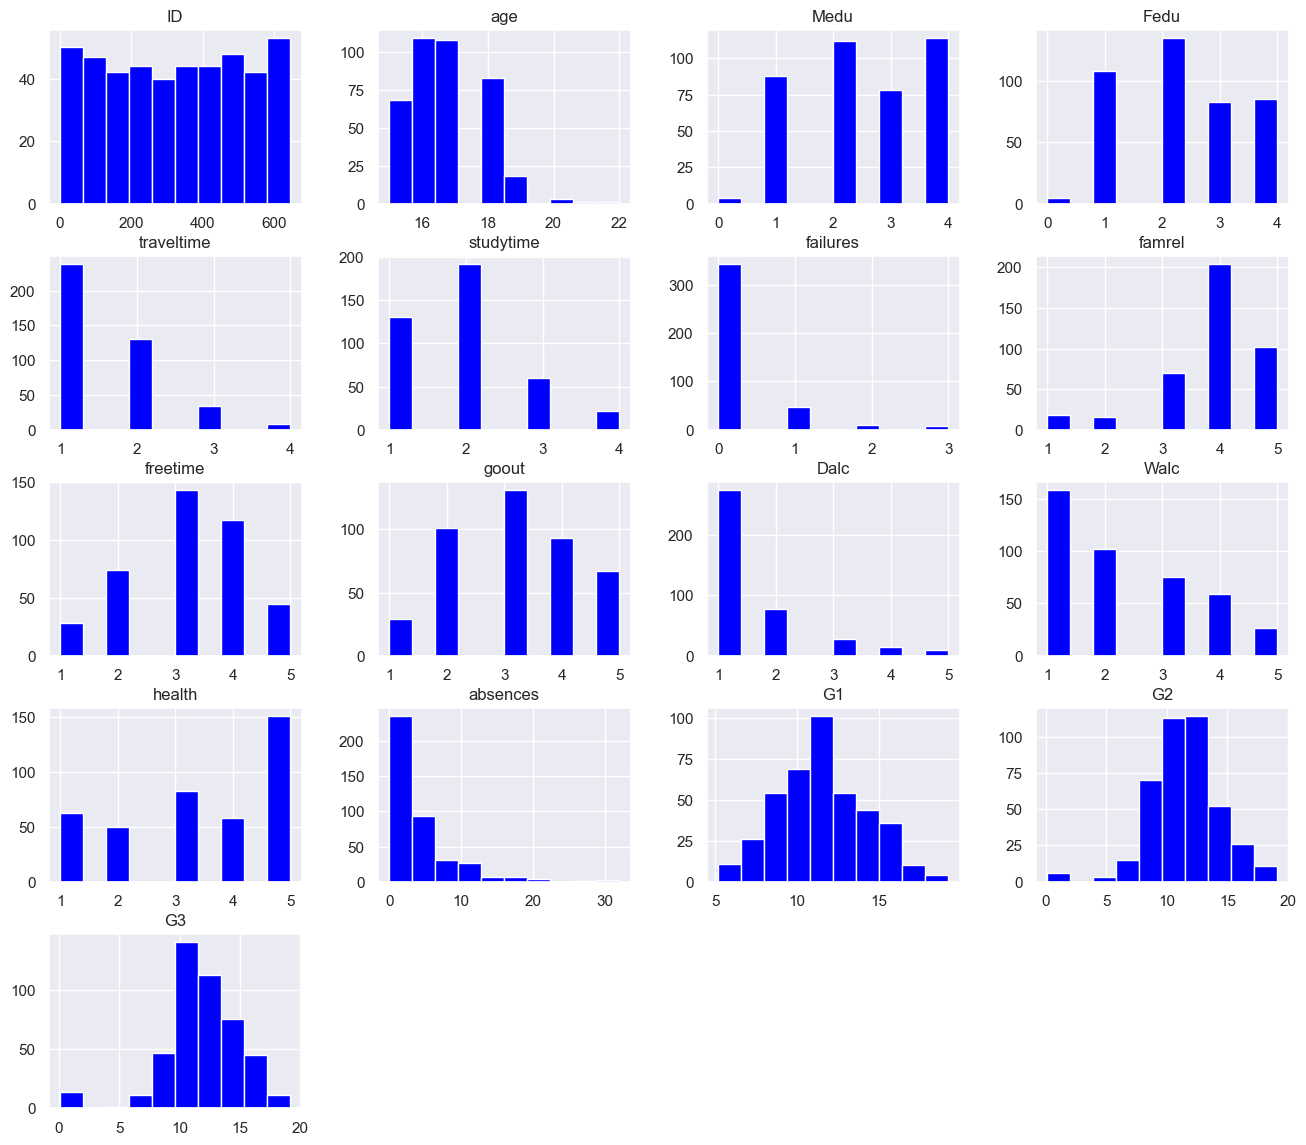

In [40]:
#값의 분포 확인하기 - numeric
numeric_feature.hist(bins=10, figsize=(16,14), color='blue');

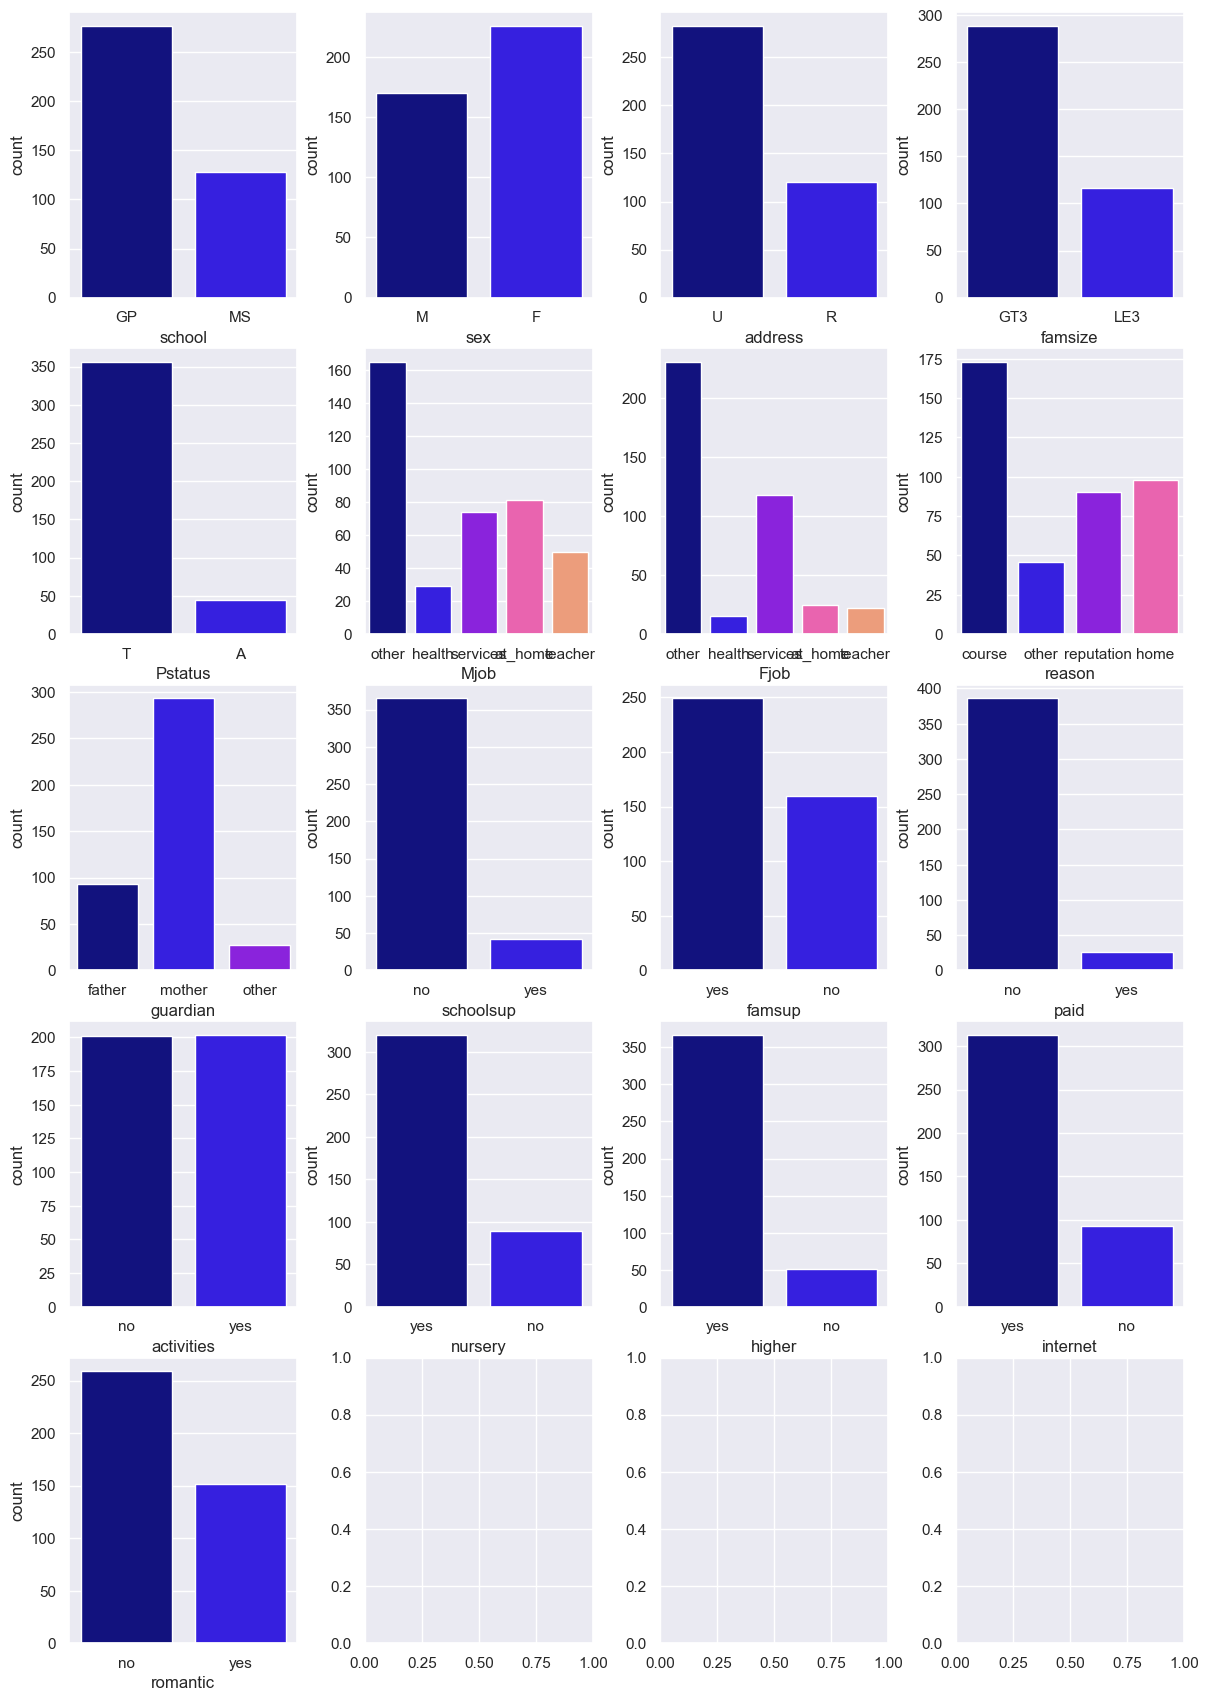

In [39]:
sns.set(palette="gnuplot2")
fig, axes = plt.subplots(round(object_feature.shape[1]/4 +1), 4, figsize=(12, 17))
fig.tight_layout()

for idx, col in enumerate(object_feature):  
    sns.countplot(x=col, data=object_feature, ax=axes[idx // 4, idx % 4])

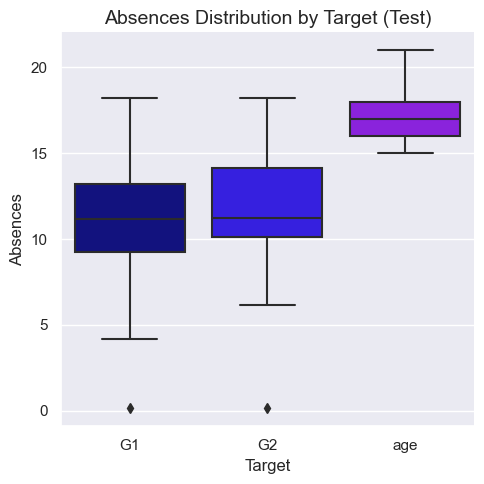

In [ ]:
cont_cols = ['G1','G2', 'age']
n_rows = len(cont_cols)
fig, axs = plt.subplots(1, 1, figsize=(5, 5))


sns.boxplot(data=test_data[cont_cols], ax=axs)
axs.set_title(f'{col.title()} Distribution by Target (Test)', fontsize=14)
axs.set_xlabel('Target', fontsize=12)
axs.set_ylabel(col.title(), fontsize=12)
sns.despine()

plt.tight_layout()
plt.show()

In [122]:
parent = pd.get_dummies(data=parent,columns=['Mjob', 'Fjob'], drop_first=True)

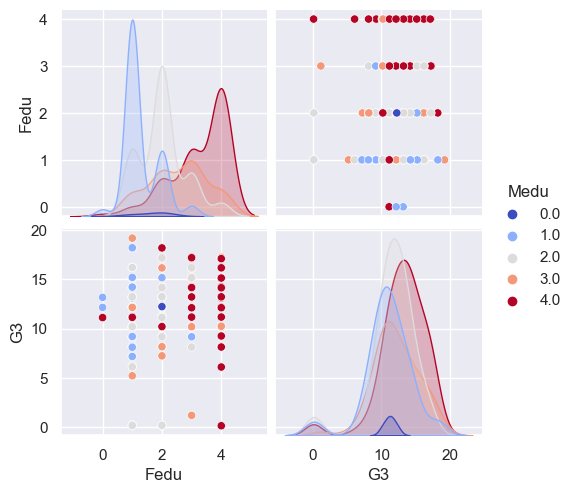

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
# 피쳐와 타겟 간의 pairplot 그리기
sns.pairplot(parent, hue='Medu', kind='scatter', palette='coolwarm')
plt.show()

### 결측치 대체 2.mark_2
1. 연속적 숫자 컬럼 ('G1','G2' > 중앙값) > minmax 스케일
2. 카테고리컬 변환 ('age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences') > 최빈값 > minmax 스케일
3. 카테고리 컬럼 > 최빈값 > 원핫 인코딩

In [93]:
mark_2 = mark_data.copy()

In [94]:
num_cols = ['G1','G2']
object_cols = mark_2.select_dtypes(exclude=np.number).columns.tolist()
category_cols = mark_2.select_dtypes(include=np.number).drop(columns=['G1','G2','G3']).columns.tolist()

In [51]:
category_cols 

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

In [52]:
for col in category_cols:
    mark_2[col] = mark_2[col].astype('category')

In [53]:
category_cols

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

In [54]:
from sklearn.model_selection import train_test_split

target = mark_2['G3']
features = mark_2.drop(columns='G3')

train_X, test_X, train_y, test_y = train_test_split(features, target, test_size=0.2, random_state=42)

In [55]:
train_X.shape, train_y.shape

((363, 32), (363,))

In [56]:
test_X.shape, test_y.shape

((91, 32), (91,))

#### 결측치 대체 3.mark_3

'failures' -> 삭제빈값

1. 연속적 숫자 컬럼 ('G1','G2') -> 'studytime' 그룹별 평균 


['studytime','famrel','Walc','health','age'] -> median

   'age' -> median - > 최대값 19로 설정, 19세 이상을 19로 설정 
   
   
   'Fedu' -> 'Fjob' 그룹별 Fedu의 Moedian으로 대체 
    'Medu' -> 'Mjob' 그룹별 Medu의 median으로 대체
    'absences' -> Walc 그룹별 median -> 비닝 
    Dalc -> Walc
    goout -> Walc
    freetime -> goout
    travel time -> free time



3. 카테고리 컬럼 > 최빈값 > 원핫 인코딩

sex -> Walc
activities -> freetime
school -> address 그룹별 최빈값으로 대체
['school','sex','activities']

 ['address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','nursery','higher','internet','romantic'] -> mode
 

In [7]:
#단순 결측치 처리 컬럼
num_median = ['studytime','famrel','Walc','health','age']
cat_mode = ['address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','nursery','higher','internet','romantic']

In [8]:
#연속형 median 대체
df[num_median]=df[num_median].transform(lambda col: col.fillna(col.median()))

In [9]:
#범주형 최빈값 대체
df[cat_mode]=df[cat_mode].transform(lambda col: col.fillna(col.mode()[0]))

In [14]:
data = {
    '이름': ['철수', '영희', '민수', '지연', '성민', '지민'],
    '성적': [90, np.nan, 75, 100, 20, np.nan],
    '부모님의 직업': ['의사', '의사', '회사원', '의사', '회사원', '회사원']
}

df = pd.DataFrame(data)


In [16]:
df.groupby('부모님의 직업').describe()

성적                                                  
        count  mean        std   min    25%   50%    75%    max
부모님의 직업                                                        
의사        2.0  95.0   7.071068  90.0  92.50  95.0  97.50  100.0
회사원       2.0  47.5  38.890873  20.0  33.75  47.5  61.25   75.0

In [17]:
df.groupby(by='부모님의 직업')['성적'].transform('mean')

0    95.0
1    95.0
2    47.5
3    95.0
4    47.5
5    47.5
Name: 성적, dtype: float64

In [ ]:
df['성적'].fillna(df.groupby(by='부모님의 직업')['성적'].transform('mean'))

In [11]:
df['성적'].fillna(df.groupby(by='부모님의 직업')['성적'].transform('mean'))

0     90.0
1     95.0
2     75.0
3    100.0
4     20.0
5     47.5
Name: 성적, dtype: float64

결측치 대체 전의 요약통계값이랑 평균도 비슷하고, 최빈값도 같은 동일 특성을 지닌 것을 볼 수 있음. 
Simple Imputer는 Medu 통계값 원본데이터와 유실

#### Groupby EDA

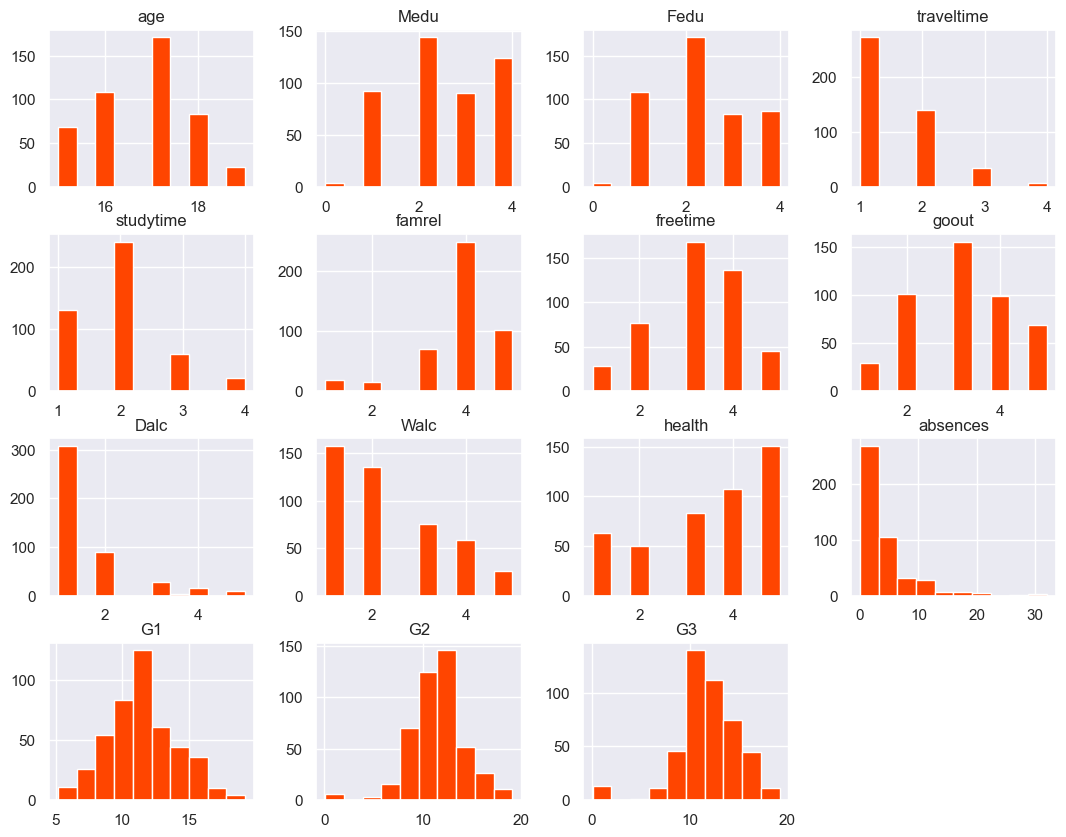

In [45]:
#값의 분포 확인하기 - numeric
df.hist(bins=10, figsize=(13,10), color='orangered');

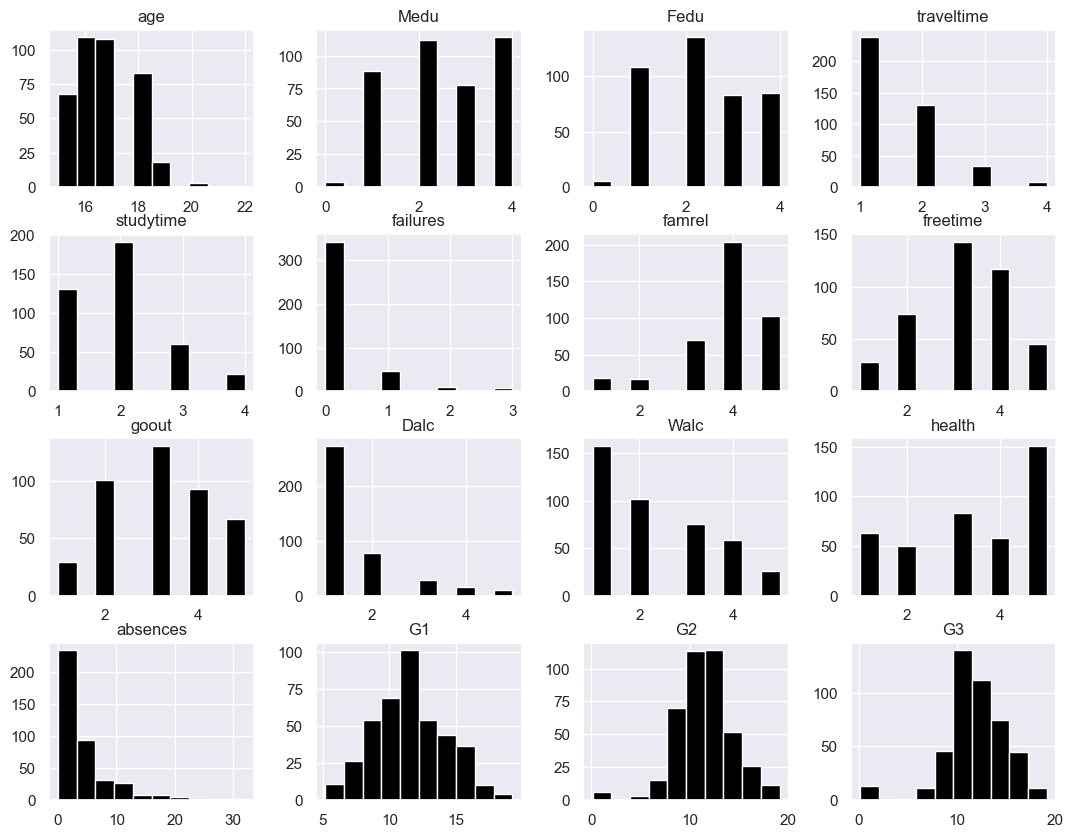

In [35]:
mark_data.hist(bins=10, figsize=(13,10), color='black');

In [30]:
cat_col = df.select_dtypes(exclude=np.number).columns.tolist()

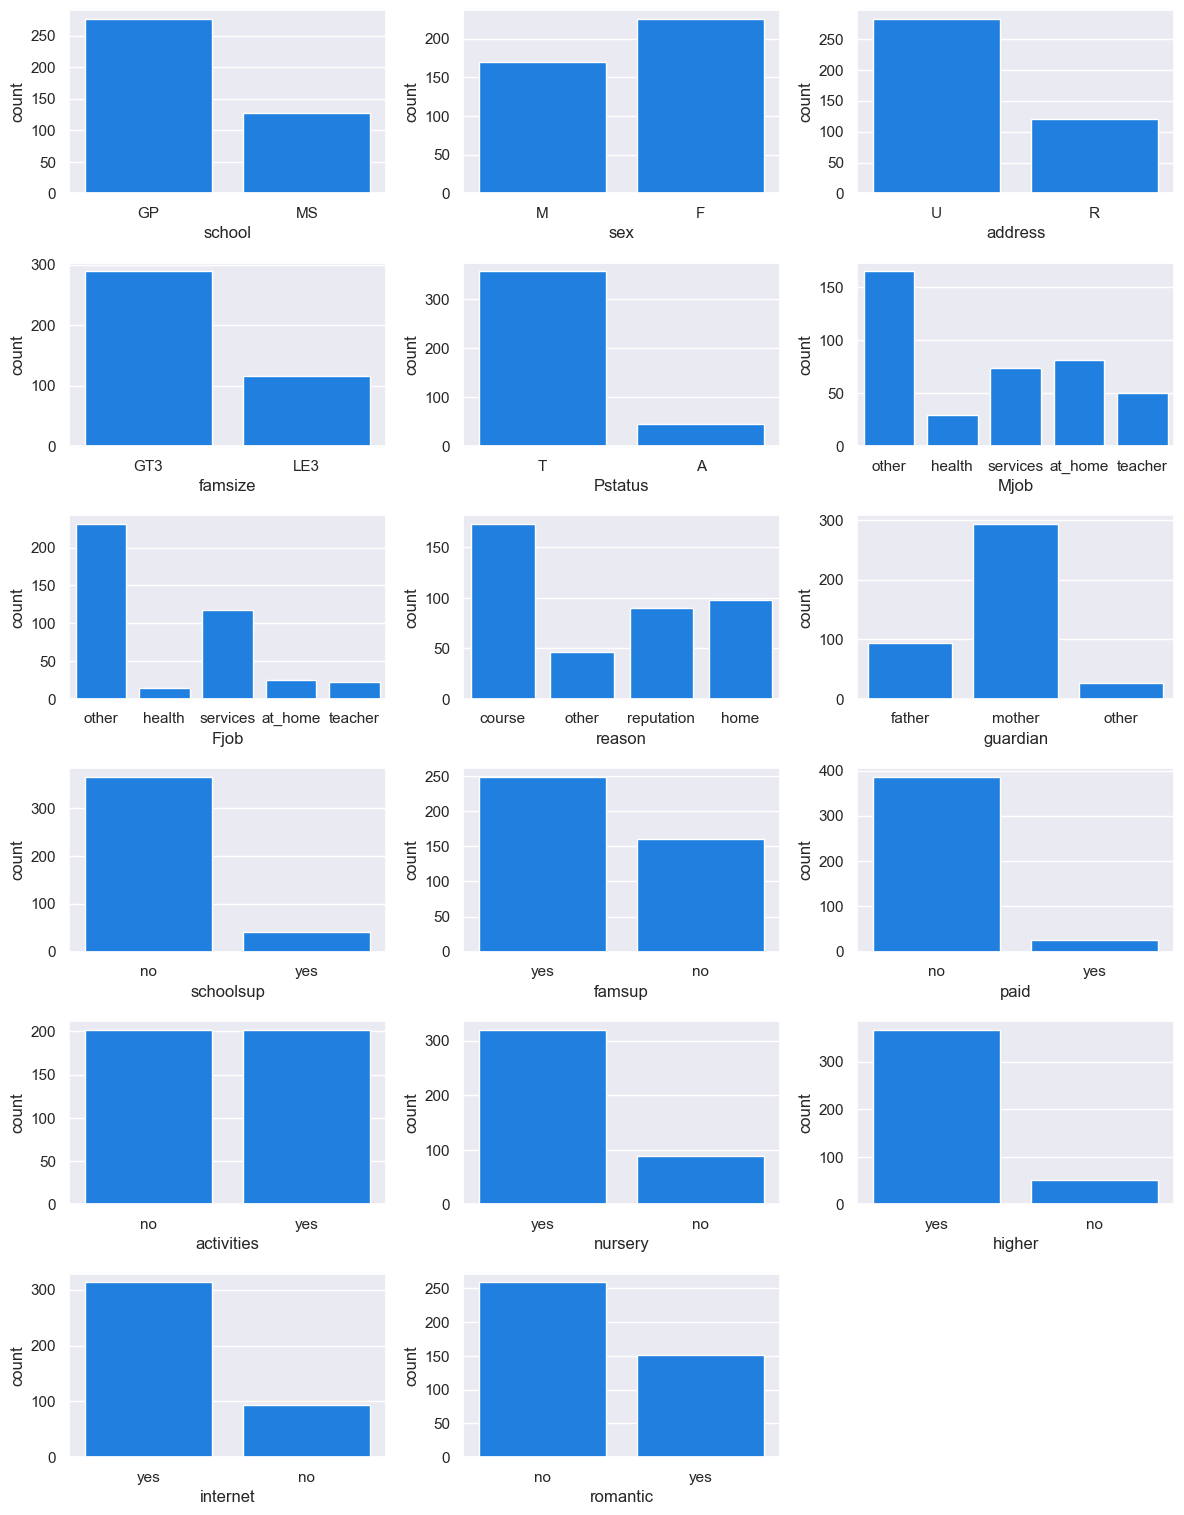

In [34]:
sns.set(palette="gist_ncar")
plt.figure(figsize=(12, 30), layout='tight')

for col in cat_col:
    plt.subplot(12, 3, cat_col.index(col) + 1)  # Adjust the subplot layout as needed
    sns.countplot(x=col, data=mark_data)

#### Pipeline

In [121]:
from sklearn.model_selection import train_test_split

target = mark_data['G3']
features = mark_data.drop(columns='G3')

train_X, test_X, train_y, test_y = train_test_split(features, target, test_size=0.2, random_state=42)

In [122]:
train_X.shape, train_y.shape

((363, 33), (363,))

In [7]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [112]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

class GroupbyImputer(BaseEstimator, TransformerMixin):
    
    ''' 
    그룹별 통계값으로 결측치를 대체하는 클래스입니다.
    group : 결측치 대체의 그룹으로 사용할 컬럼
    nan_feature : 결측치가 있는 컬럼
    strategy : 결측치 대체 전략으로, 'mean','median','mode'를 매개변수로 받을 수 있습니다.
    
    '''
    
    def __init__(self, group, nan_feature, strategy):
        self.group = group
        self.nan_feature = nan_feature
        self.strategy = strategy if strategy != 'mode' else lambda x: x.mode().iloc[0]       
        

    def fit(self, X, y=None):
        #각 그룹별 self.strategy로 바꾼 X 데이터프레임 저장
        self.groupbydf = X.groupby(self.group)[self.nan_feature].transform(self.strategy)
        return self

    
    def transform(self, X):
        #결측있는 인덱스와 self.groupbydf 인덱스의 값으로 결측치 채움  
        X[self.nan_feature].fillna(self.groupbydf, inplace=True)
        return X

In [113]:
simple_num = ['studytime','famrel','Walc','health', 'age']
simple_cat = ['address','famsize','Pstatus','Mjob','Fjob',
              'reason','guardian','schoolsup','famsup','paid',
              'nursery','higher','internet','romantic']

In [114]:
#1. 단순 결측치 처리 파이프라인
simple_IMP = ColumnTransformer(
    transformers=[('sim_num',SimpleImputer(strategy="median"), simple_num),
                  ('sim_cat',SimpleImputer(strategy="most_frequent"), simple_cat)],
    remainder='passthrough', verbose_feature_names_out=False
)

In [117]:
#2.num-그룹별 중앙값 1 파이프라인
imputegroupby_1 = Pipeline(steps=[
    ('fedu', GroupbyImputer(group='Fjob',nan_feature='Fedu', strategy='median')),
    ('medu', GroupbyImputer(group='Mjob',nan_feature='Medu', strategy='median')),
    ('group_Walc', GroupbyImputer(group='Walc',nan_feature='Dalc', strategy='median')),
    ('group_Walc2', GroupbyImputer(group='Walc',nan_feature='goout', strategy='median')),
    ('group_Walc3', GroupbyImputer(group='Walc',nan_feature='absences', strategy='median'))
])

In [149]:
total = Pipeline([('simple', simple_IMP),
                  ('group', imputegroupby_1),
                  ('group2', imputegroupby_2),
                  ('group3', imputegroupby_3),
                  ('scale', scale)])

In [150]:
df = total.fit_transform(train_X, train_y)

In [151]:
df.isna().sum()

ID                   0
Medu                 0
Fedu                 0
traveltime           0
studytime            0
famrel               0
freetime             0
goout                0
Dalc                 0
Walc                 0
health               0
G1                   0
G2                   0
school_GP            0
school_MS            0
sex_F                0
sex_M                0
address_R            0
address_U            0
famsize_GT3          0
famsize_LE3          0
Pstatus_A            0
Pstatus_T            0
Mjob_at_home         0
Mjob_health          0
Mjob_other           0
Mjob_services        0
Mjob_teacher         0
Fjob_at_home         0
Fjob_health          0
Fjob_other           0
Fjob_services        0
Fjob_teacher         0
reason_course        0
reason_home          0
reason_other         0
reason_reputation    0
guardian_father      0
guardian_mother      0
guardian_other       0
schoolsup_no         0
schoolsup_yes        0
famsup_no            0
famsup_yes 

In [115]:
#사용자 정의 객체 설정

max_limit = lambda x: np.where(x >= 19, 19, x)
limit_transformer = FunctionTransformer(max_limit)

log_transformer = FunctionTransformer(np.log1p)

In [128]:
#3.num-그룹별 중앙값 2 파이프라인
imputegroupby_2 = Pipeline(steps=[
    ('G1', GroupbyImputer(group='studytime',nan_feature='G1', strategy='median')),
    ('G2', GroupbyImputer(group='studytime',nan_feature='G2', strategy='median')),
    ('free', GroupbyImputer(group='goout',nan_feature='freetime', strategy='median')),
    ('travel', GroupbyImputer(group='freetime',nan_feature='traveltime', strategy='median'))
])

In [129]:
#4.cat-그룹별 최빈값 3 파이프라인
imputegroupby_3 = Pipeline(steps=[
    ('sex', GroupbyImputer(group='Walc',nan_feature='sex', strategy='mode')),
    ('activities', GroupbyImputer(group='freetime',nan_feature='activities', strategy='mode')),
    ('school', GroupbyImputer(group='address',nan_feature='school', strategy='mode'))
])

In [136]:
num = ['ID',  'Medu', 'Fedu', 'traveltime', 'studytime', 
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 
       'G1', 'G2']

cat = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']

In [137]:
binning_pipe= Pipeline(steps=[
    ('log_scale', log_transformer)])

In [138]:
limit_scale_pipe = Pipeline(steps=[
    ('limit', limit_transformer),
    ('scale', MinMaxScaler())])

In [148]:
#5. 스케일 컬럼 
scale = ColumnTransformer(
    transformers=[('num_scale', MinMaxScaler(), num),
                  ('cat_scale', OneHotEncoder(sparse_output=False), cat),
                  ('age_limit_scale', RobustScaler(), ['age'])],
    remainder='drop', verbose_feature_names_out=False
)

In [447]:
#전처리 1 파이프라인

preprocessor1 = make_pipeline(
       simple_IMP
)

In [448]:
#전처리 2 파이프라인

preprocessor2 = make_pipeline(
    imputegroupby_1,
    imputegroupby_2,
    imputegroupby_3,
    scale
)

In [449]:
preprocessor1.fit(train_X)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sim_num',
                                                  SimpleImputer(strategy='median'),
                                                  ['studytime', 'famrel',
                                                   'Walc', 'health', 'age']),
                                                 ('sim_cat',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['address', 'famsize',
                                                   'Pstatus', 'Mjob', 'Fjob',
                                                   'reason', 'guardian',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'nursery', 'higher',
                                                   'internet', 'romantic'])],
                                   verbose_feature_names_out=False))])

In [460]:
simple_imp = preprocessor1.fit_transform(train_X)
col1 = preprocessor1.get_feature_names_out()

In [461]:
simple_test = preprocessor1.transform(test_X)
col1 = preprocessor1.get_feature_names_out()

In [462]:
pre1_test = pd.DataFrame(simple_test, columns=col1)

In [452]:
 preprocessor2.fit(pre1)

Pipeline(steps=[('pipeline-1',
                 Pipeline(steps=[('fedu',
                                  GroupbyImputer(group='Fjob',
                                                 nan_feature='Fedu',
                                                 strategy='median')),
                                 ('medu',
                                  GroupbyImputer(group='Mjob',
                                                 nan_feature='Medu',
                                                 strategy='median')),
                                 ('group_Walc',
                                  GroupbyImputer(group='Walc',
                                                 nan_feature='Dalc',
                                                 strategy='median')),
                                 ('group_Walc2',
                                  GroupbyImputer(group='Walc',
                                                 nan_feature='goout',
                                                 strategy='...
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic']),
                                                 ('age_limit_scale',
                                                  Pipeline(steps=[('limit',
                                                                   FunctionTransformer(func=<function <lambda> at 0x00000262886D95A0>)),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['age']),
                                                 ('abs_log_bin',
                                                  Pipeline(steps=[('log_scale',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>))]),
                                                  ['absences'])],
                                   verbose_feature_names_out=False))])

In [453]:
pre2 = preprocessor2.fit_transform(pre1)

In [463]:
pre2_test = preprocessor2.transform(pre1_test)

In [454]:
lr = LinearRegression()

In [455]:
lr.fit(pre2, train_y)

LinearRegression()

In [464]:
lr.score(pre2_test, test_y)

0.8454063446804698

In [456]:
lr.score(pre2, train_y)

0.791283074691948

In [457]:
from sklearn.metrics import mean_squared_error

In [458]:
y_pred = lr.predict(pre2)

In [465]:
y_pred_test = lr.predict(pre2_test)

In [459]:
mean_squared_error(y_pred, train_y, squared = True)

2.181422963069043

In [466]:
mean_squared_error(y_pred_test, test_y, squared = True)

1.8795495147958985

타겟 G3빼고 전부 결측치 존재

### 3. Pipeline